# 重力数据正反演
### 观测网格生成
重力异常正演关键记住两点，场源定义和观测系统生成，在gridder模块中，由两个函数负责生成网格，regular生成规则网格，scatter可生成随机网格。
下面是一个采用reguler生成的规则网格样子，函数调用方法如下：


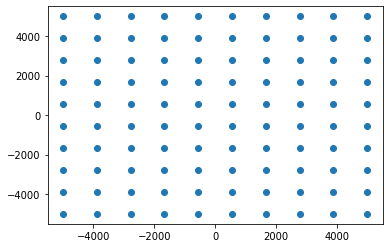

In [1]:
from geoist import gridder
import matplotlib.pyplot as plt
shape =(10, 10) 
xp, yp, zp = gridder.regular((-5000, 5000, -5000, 5000), shape, z=-150)
plt.scatter(xp, yp)

当然也可以生成非均匀网格，换做调用scatter函数即可，参数设置与regular相似，不多解释看代码就明白了。

### 正六面体模型重力异常正演计算
给定一个场源的几何形态与剩余密度，计算指定位置的重力异常值，这个过程就是异常体的正演。下面我们看看在GEOIST里面，有哪些函数支持干这事。
六面体作为最常见的几何形态，在位场解释中具有广泛的应用，因为任何复杂的三维异常体，都可以用一组六面体来逼近。
在inversion模块中的geometry.py文件中封装了多种形体类定义,Prism就是六面体，生成模型代码如下：


In [2]:
from geoist.inversion import geometry
geometry.Prism(-4000, -3000, -4000, -3000, 0, 2000, {'density': 1000})

生成一组模型，用一个list包装起来即可，模型单元坐标单位m，向下为正，密度单位kg/m3。
### 正演实例

In [3]:
import matplotlib.pyplot as plt 
# local imports 
from geoist import gridder 
from geoist.inversion import geometry 
from geoist.pfm import prism 
from geoist.vis import giplt 
model = [geometry.Prism(-4000, -3000, -4000, -3000, 0, 2000, {'density': 1000}), 
geometry.Prism(-1000, 1000, -1000, 1000, 0, 2000, {'density': -900}), 
geometry.Prism(2000, 4000, 3000, 4000, 0, 2000, {'density': 1300})] 
shape = (100, 100) 
xp, yp, zp = gridder.regular((-5000, 5000, -5000, 5000), shape, z=-150) 
field0 = prism.potential(xp, yp, zp, model) 
fields = [prism.gx(xp, yp, zp, model), 
prism.gy(xp, yp, zp, model), 
prism.gz(xp, yp, zp, model), 
prism.gxx(xp, yp, zp, model), 
prism.gxy(xp, yp, zp, model), 
prism.gxz(xp, yp, zp, model), 
prism.gyy(xp, yp, zp, model), 
prism.gyz(xp, yp, zp, model), 
prism.gzz(xp, yp, zp, model)] 

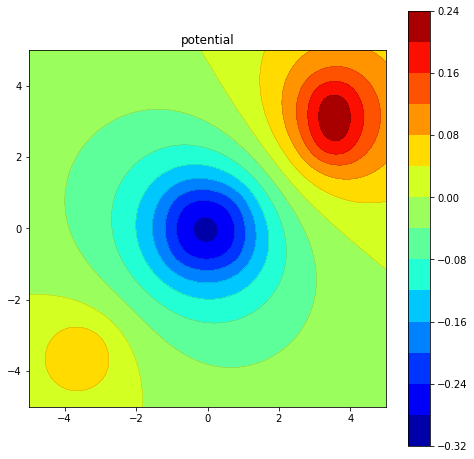

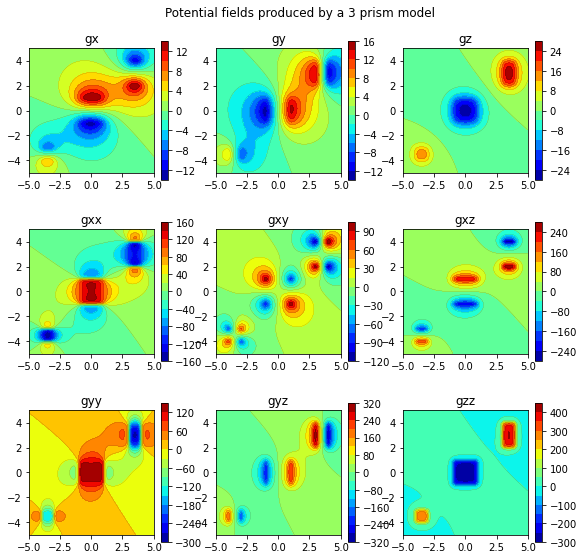

In [4]:
titles = ['potential', 'gx', 'gy', 'gz', 
'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz'] 
plt.figure(figsize=(8, 8)) 
plt.axis('scaled')
plt.title(titles[0]) 
levels = giplt.contourf(yp * 0.001, xp * 0.001, field0, shape, 15) 
cb = plt.colorbar() 
giplt.contour(yp * 0.001, xp * 0.001, field0, shape, 
levels, clabel=False, linewidth=0.1) 
plt.show() 
plt.figure(figsize=(8, 8)) 
plt.subplots_adjust(left=0.03, right=0.95, bottom=0.05, top=0.92, hspace=0.3) 
plt.suptitle("Potential fields produced by a 3 prism model") 
for i, field in enumerate(fields): 
    plt.subplot(3, 3, i + 1) 
    plt.axis('scaled') 
    plt.title(titles[i+1]) 
    levels = giplt.contourf(yp * 0.001, xp * 0.001, field, shape, 15) 
    cb = plt.colorbar() 
    giplt.contour(yp * 0.001, xp * 0.001, field, shape, 
                    levels, clabel=False, linewidth=0.1) 
plt.show()

### 球坐标下的六面体模型重力异常正演计算
除了正六面体外，在球坐标系下，还支持Tesseroid形式的单元，直接经纬度剖分网格即可，不用变换为直角坐标。这对大尺度模型解释时候常常是有用的，比如地震重力场源模型计算与解释。

In [5]:
import time  
import matplotlib.pyplot as plt 
#from mpl_toolkits.basemap import Basemap  
from geoist import gridder 
from geoist.inversion.geometry import Tesseroid 
from geoist.pfm import polyprism,giutils,tesseroid 
from geoist.vis import giplt 
model = [Tesseroid(-60, -55, -30, -27, 0, -500000, props={'density': 200}), 
Tesseroid(-66, -62, -18, -12, 0, -300000, props={'density': -500})] 
# Create the computation grid 
area = (-80, -30, -40, 10) 
shape = (100, 100) 
lons, lats, heights = gridder.regular(area, shape, z=250000)
start = time.time() 
fields0 = [tesseroid.potential(lons, lats, heights, model)]
fields = [ 
        tesseroid.gx(lons, lats, heights, model), 
        tesseroid.gy(lons, lats, heights, model), 
        tesseroid.gz(lons, lats, heights, model), 
        tesseroid.gxx(lons, lats, heights, model), 
        tesseroid.gxy(lons, lats, heights, model), 
        tesseroid.gxz(lons, lats, heights, model), 
        tesseroid.gyy(lons, lats, heights, model), 
        tesseroid.gyz(lons, lats, heights, model), 
        tesseroid.gzz(lons, lats, heights, model)
        ] 
print("Time it took: %s" % (time.time() - start)) 

Time it took: 33.65332102775574


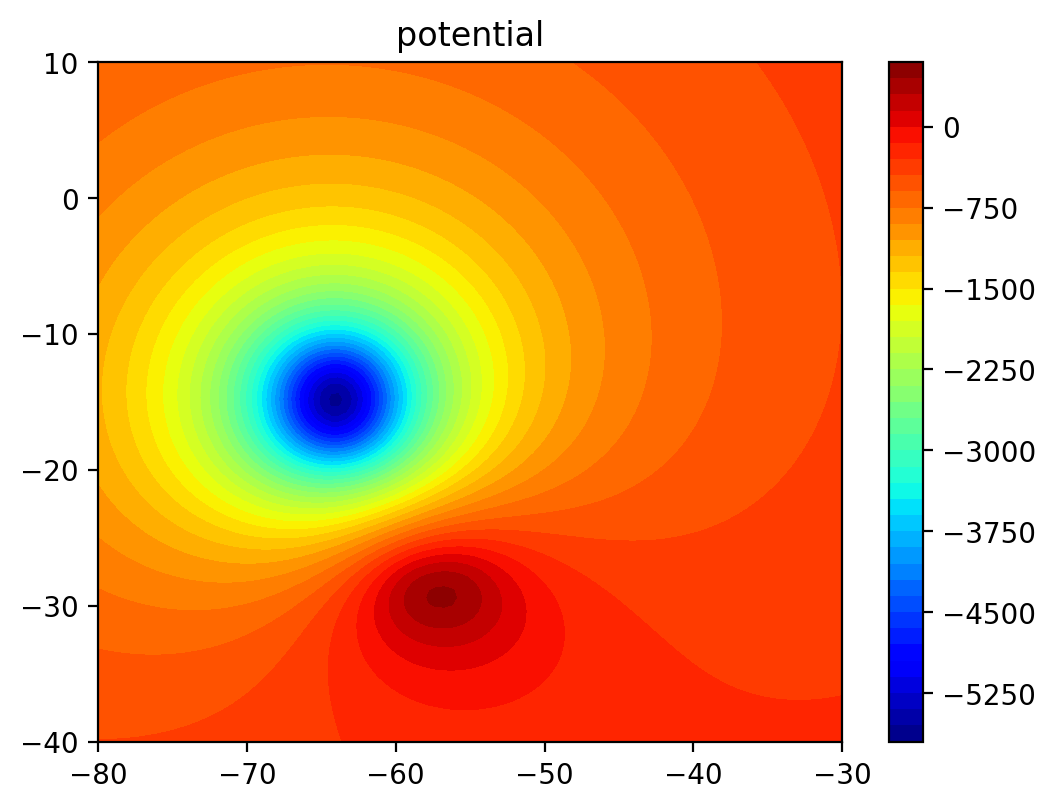

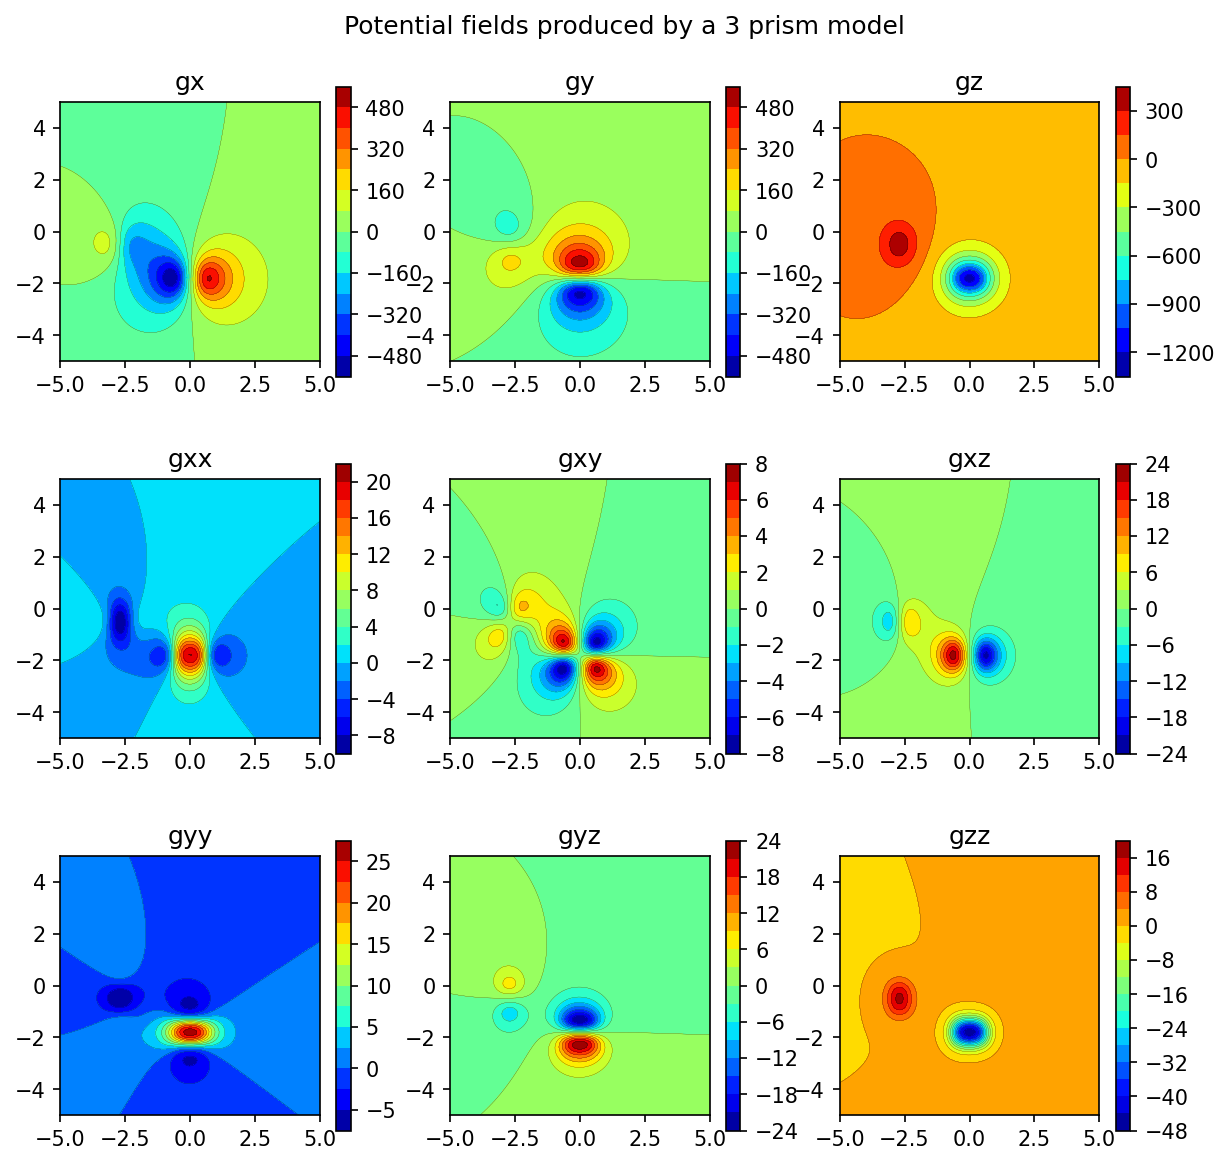

In [6]:
titles = ['potential', 'gx', 'gy', 'gz', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz'] 
plt.figure(figsize=(6, 4.5), dpi = 200) 
plt.title(titles[0]) 
giplt.contourf(lons, lats, fields0, shape, 40) 
plt.colorbar()
plt.figure(figsize=(5, 5), dpi = 150) 
plt.subplots_adjust(left=0.03, right=0.95, bottom=0.05, top=0.92, hspace=0.3) 
plt.suptitle("Potential fields produced by a 3 prism model") 
for i, field in enumerate(fields): 
    plt.subplot(3, 3, i+1 ) 
    plt.axis('scaled') 
    plt.title(titles[i+1]) 
    levels = giplt.contourf(yp * 0.001, xp * 0.001, field, shape, 15) 
    cb = plt.colorbar() 
    giplt.contour(yp * 0.001, xp * 0.001, field, shape, 
                    levels, clabel=False, linewidth=0.1) 
plt.show()

# 重力数据反演之理论基础
<div  align="center">  
<img src="figures/inversion_basic.png" width = "500"/>
</div>

### 反演目标函数
$
\phi=\| Gm-d \|^2 + \lambda \| m \|^2 
$
上式中右端第二项可以通常称为正则项，其核心思想是引入一个罚函数$\phi$，在原来的norm项中加入对模型$m$的约束。  
其矩阵实现，等价于以下形式:
$
G^2 m = d^2
$
其中，
$
G^2 = \begin{pmatrix}
G\\
\lambda I \\
\end{pmatrix} d^2 =\begin{pmatrix}
d\\
0 \\
\end{pmatrix}
$

在实际的反演问题中，往往需要根据需求采取不同的正则化方法，常见的包括最小模型约束、光滑约束、深度加权等。此时，正则项可以写为：
$
\phi = \lambda \| W_m (m-m_{ref}) \| ^2
$
    
$
W_m^TW_m = \alpha_s W_r I +\alpha_x W_r B_x^TB_x +\alpha_y W_r B_y^TB_y + \alpha_z W_r B_z^TB_z
$

上式中，$\alpha_s, \alpha_x, \alpha_y, \alpha_z$分别为最小模型约束系数以及$x,y,z$三个方向上光滑项的系数；$W_r$为深度加权函数；$B_x, B_y, B_z$为光滑矩阵，通常为一阶差分或二阶差分形式。

深度加权函数有多种，通常采用下式的形式：
$
W_r(z)=\frac{1}{(z_i+z_0)^{\frac{\beta}{2}}}
$

式中：$z_i$为每个单元体的深度；$z_0, \beta$为参数，通常情况下取$\beta=2$。

## 示例程序

In [7]:
#导入依赖模块
import matplotlib.pyplot as plt
import numpy as np
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import prism
from geoist.pfm import giutils
from geoist.inversion.mesh import PrismMesh
from geoist.vis import giplt
from geoist.inversion.regularization import Smoothness,Damping
from geoist.inversion.pfmodel import SmoothOperator
from geoist.inversion.hyper_param import LCurve
from geoist.pfm import inv3d

/home/pi/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [8]:
#创建网格参数文件以及密度文件，便于mesh3D软件读取并进行三维成像
meshfile = r"data_out/msh.txt" 
densfile = r"data_out/den.txt"

#生成场源网格
area = (-20000, 20000, -20000, 20000, 2000, 32000) #NS EW Down
shape = (5, 5, 5) #nz ny nx 
#构建网格单元
mesh = PrismMesh(area, shape)

In [9]:
#设置理论模型密度分布
density=np.zeros(shape)
density[2:4,1:3,2:4]=1.0 # z x y
#将密度数据写入文件
mesh.addprop('density', density.ravel()) 
mesh.dump(meshfile, densfile, 'density')

 #生成观测网格
narea = (-28750, 28750,-48750, 48750) #NS, EW
nshape = (20, 20) #NS, EW

In [10]:
#生成核矩阵 
kernel=[]
depthz = []
xp, yp, zp = gridder.regular(narea, nshape, z=-1)
for i, layer in enumerate(mesh.layers()):
    for j, p in enumerate(layer):
        x1 = mesh.get_layer(i)[j].x1
        x2 = mesh.get_layer(i)[j].x2
        y1 = mesh.get_layer(i)[j].y1
        y2 = mesh.get_layer(i)[j].y2
        z1 = mesh.get_layer(i)[j].z1
        z2 = mesh.get_layer(i)[j].z2
        den = mesh.get_layer(i)[j].props
        model=[geometry.Prism(x1, x2, y1, y2, z1, z2, {'density': 1000.})]
        field = prism.gz(xp, yp, zp, model)
        kernel.append(field) 
        depthz.append((z1+z2)/2.0)
kk=np.array(kernel)
kk=np.transpose(kernel)  #kernel matrix for inversion, 500 cells * 400 points

In [11]:
#获取利用理论重力异常
field0 = np.mat(kk)*np.transpose(np.mat(density.ravel()))
field = giutils.contaminate(np.array(field0).ravel(), 0.05, percent = True)

array([-4.,  0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44.,
       48.])

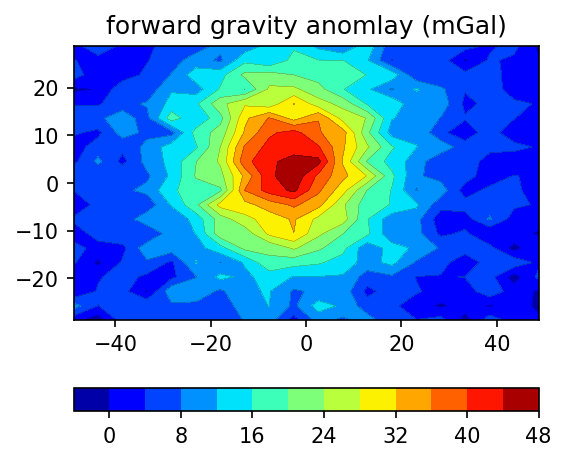

In [12]:
plt.figure(figsize = (4, 4), dpi =150)
plt.axis('scaled')
plt.title('forward gravity anomlay (mGal)')
levels = giplt.contourf(yp * 0.001, xp * 0.001, field, nshape, 15)
cb = plt.colorbar(orientation='horizontal')
giplt.contour(yp * 0.001, xp * 0.001, field, nshape,
                levels, clabel=False, linewidth=0.1)

In [13]:
#似然函数
datamisfit = inv3d.Density3D(np.array(field.T).ravel(), [xp, yp, zp], mesh) 

In [14]:
#构建最小结构约束正则项
#regul = Damping(datamisfit.nparams) 

#创建光滑矩阵
smop = SmoothOperator() 
nz = 5 
ny = 5 
nx = 5 
p = np.eye(nz*ny*nx).reshape(-1,nz,ny,nx) 
sx = smop.derivation(p, component = 'dx').reshape(nz*ny*nx,-1) 
sy = smop.derivation(p, component = 'dy').reshape(nz*ny*nx,-1) 
sz = smop.derivation(p, component = 'dz').reshape(nz*ny*nx,-1)

#不同方向光滑权重设置
am = 0.1  
ax = 1 
ay = 1
az = 1
#深度加权参数
z0 = 11000
beta = 1.0

wdepth = np.diag(1./(np.array(depthz)+z0)**beta)
#构建正则项
sm = np.vstack((am*np.eye(nz*ny*nx)*wdepth,
                az*np.dot(sz.T,wdepth),
                ay*np.dot(sy.T,wdepth),
                ax*np.dot(sx.T,wdepth)))
regul = Smoothness(sm)

In [15]:
datamisfit = inv3d.Density3D(np.array(field.T).ravel(), [xp, yp, zp], mesh
                             , movemean = False)
regul_params = [10**i for i in range(-10, 10, 1)]
density3d = LCurve(datamisfit, regul, regul_params, loglog=True)

initial = np.zeros(nz*ny*nx) #np.ones(datamisfit.nparams)
#initial = density.flatten()
minval = initial - 0.5
maxval = initial + 0.5
bounds = list(zip(minval, maxval))
x0 = initial + 1.0
_ = density3d.config('tcbound', bounds = bounds, nparams = datamisfit.nparams, x0  = x0).fit()

(125, 400)
inital misfit = 23110837.037021432
final misfit = 2139.9103295628734
inital misfit = 23110837.037021432
final misfit = 2139.9103295628734
inital misfit = 23110837.037021432
final misfit = 2139.9103295628734
inital misfit = 23110837.037021432
final misfit = 2139.9103018543465
inital misfit = 23110837.037021432
final misfit = 2139.910291634162
inital misfit = 23110837.037021432
final misfit = 2139.9102202160175
inital misfit = 23110837.037021432
final misfit = 2139.910184700208
inital misfit = 23110837.037021432
final misfit = 2139.910284619917
inital misfit = 23110837.037021432
final misfit = 2139.9102992973626
inital misfit = 23110837.037021432
final misfit = 2139.9101935581393
inital misfit = 23110837.037021447
final misfit = 2139.910287007229
inital misfit = 23110837.037022762
final misfit = 2139.9101478313355
inital misfit = 23110837.03715443
final misfit = 2139.911318073274
inital misfit = 23110837.050321054
final misfit = 2140.0220947286057
inital misfit = 23110838.3669

Hyperparameter Lambda value is 0.0001


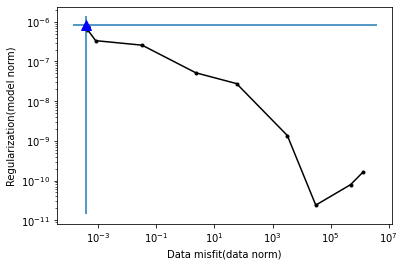

In [ ]:
print('Hyperparameter Lambda value is {}'.format(density3d.regul_param_))
density3d.plot_lcurve()

res mean=-0.0000; std=0.0010


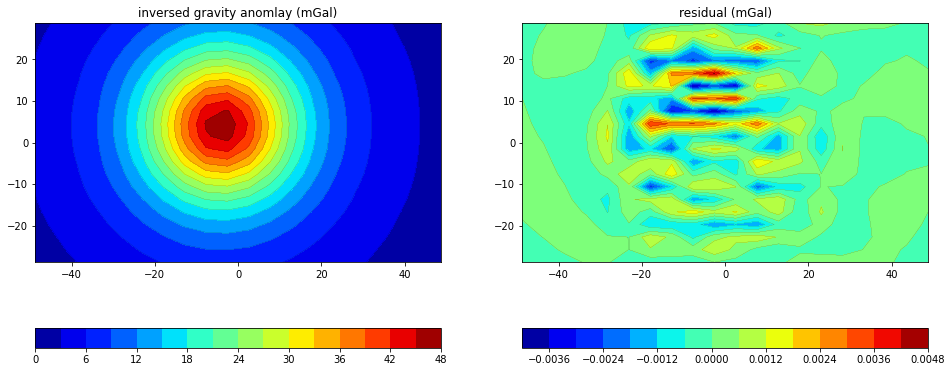

In [ ]:
predicted = density3d[0].predicted()
residuals = density3d[0].residuals()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.axis('scaled')
plt.title('inversed gravity anomlay (mGal)')
levels = giplt.contourf(yp * 0.001, xp * 0.001, predicted, nshape, 15)
cb = plt.colorbar(orientation='horizontal')
giplt.contour(yp * 0.001, xp * 0.001, predicted, nshape,
                levels, clabel=False, linewidth=0.1)

plt.subplot(1, 2, 2)
plt.axis('scaled')
plt.title('residual (mGal)')
levels = giplt.contourf(yp * 0.001, xp * 0.001, residuals, nshape, 15)
cb = plt.colorbar(orientation='horizontal')
giplt.contour(yp * 0.001, xp * 0.001, residuals, nshape,
                levels, clabel=False, linewidth=0.1)
plt.savefig("18-11.pdf")
print('res mean={:.4f}; std={:.4f}'.format(residuals.mean(), residuals.std()))

In [ ]:
#保存反演结果
densinv = r"data/outdeninvmean.txt"
values = np.fromiter(density3d.p_, dtype=np.float)
reordered = np.ravel(np.reshape(values, mesh.shape), order='F')
np.savetxt(densinv, reordered, fmt='%.8f')

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_array = np.linspace(area[0], area[1], num = shape[2], endpoint = True)
y_array = np.linspace(area[2], area[3], num = shape[1], endpoint = True)
z_array = np.linspace(area[4], area[5], num = shape[0], endpoint = True)
density_recovered=values.reshape(nx, ny, nz)

In [ ]:
def draw_density(x, y, z, density, direction='z', layer = 1, shape = shape, size = "None", datatype = "Recovered"):
    if direction == "z":
        xx = y
        yy = x
        den_ = density[layer-1, :, :]
        title = datatype + " density distribution in z direction."
    if direction == "y":
        xx = x
        yy = -z
        den_ = density[:, layer-1, :]
        title = datatype + " density distribution in y direction."
    if direction == "x":
        xx = y
        yy = -z
        den_ = density[:, :, layer-1]
        title = datatype + " density distribution in x direction."
    if size == "None":
        pp = float(len(yy)/len(xx))
        size = (6+1, 6*pp)
        
    plt.figure(figsize = size, dpi = 100)
    plt.pcolor(xx, yy, den_, edgecolors = 'k', linewidth = 2)
    plt.title(title)
    plt.colorbar()
    plt.show()
    

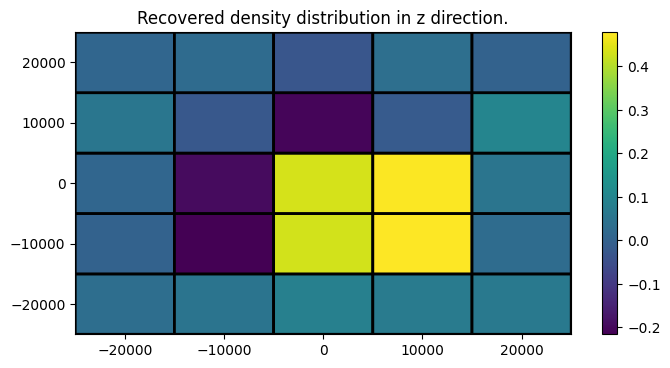

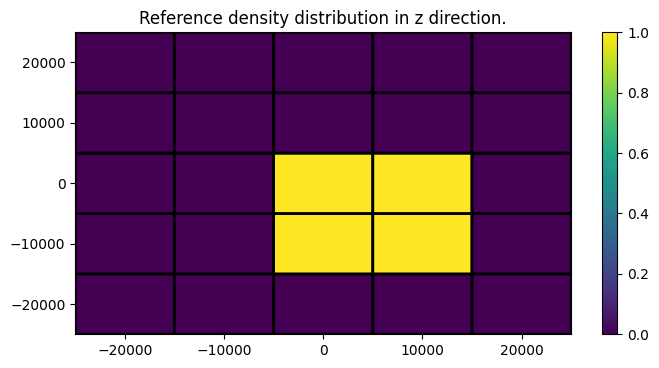

In [ ]:
draw_density(x_array, y_array, z_array, density_recovered, direction='z', layer = 3, shape = shape, size = (8, 4))
draw_density(x_array, y_array, z_array, density, direction='z', layer = 3, shape = shape, size = (8, 4), datatype = "Reference")

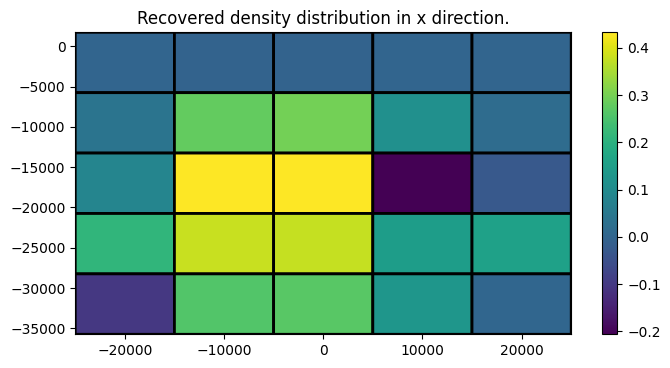

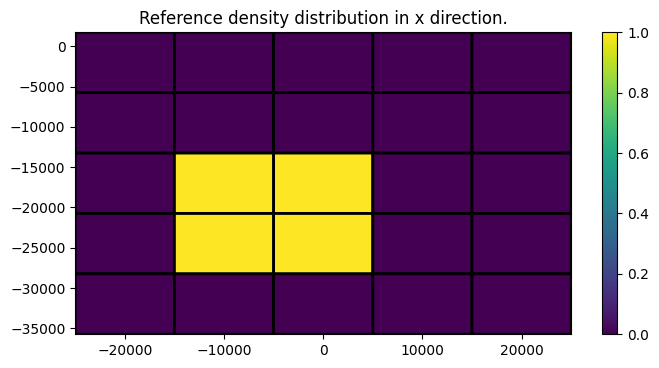

In [ ]:
draw_density(x_array, y_array, z_array, density_recovered, direction='x', layer = 3, shape = shape, size = (8, 4))
draw_density(x_array, y_array, z_array, density, direction='x', layer = 3, shape = shape, size = (8, 4), datatype = "Reference")

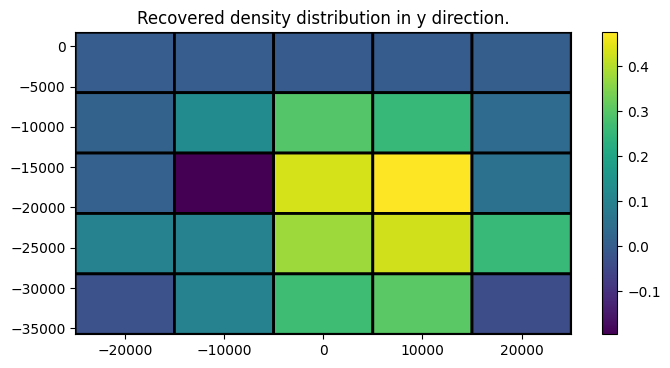

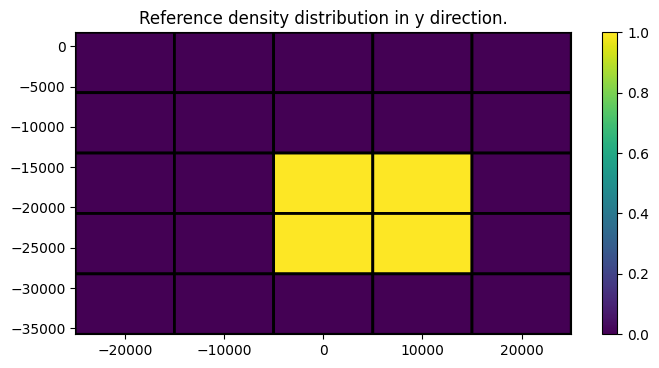

In [ ]:
draw_density(x_array, y_array, z_array, density_recovered, direction='y', layer = 3, shape = shape, size = (8, 4))
draw_density(x_array, y_array, z_array, density, direction='y', layer = 3, shape = shape, size = (8, 4), datatype = "Reference")